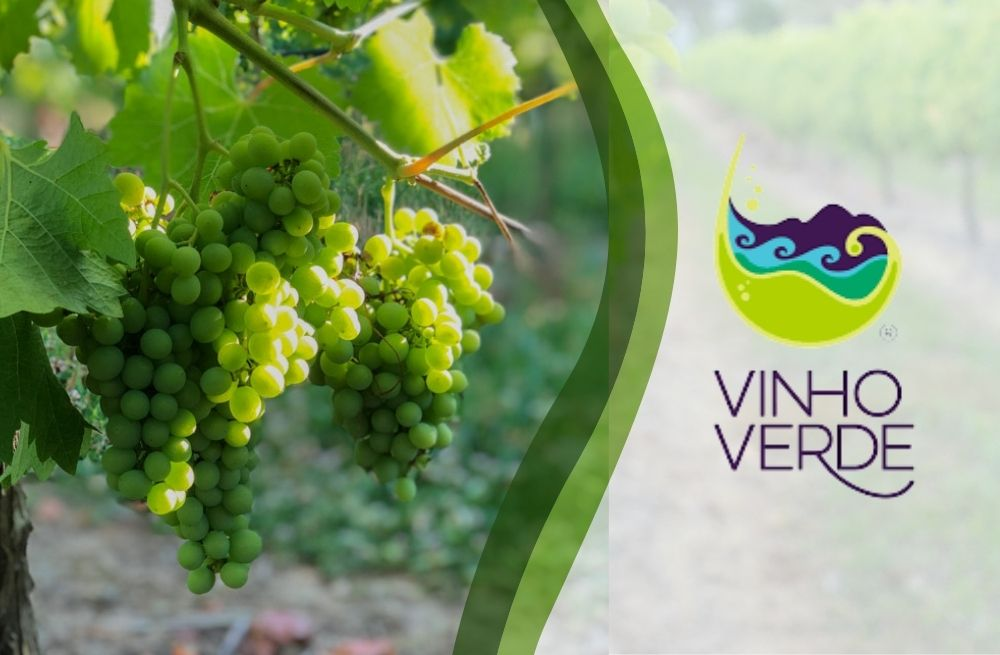

# **1. DESCRIPCIÓN DEL DATA SET**

**DESCRIPCIÓN**

El siguiente data set con el cual trabajaremos fue extraido de https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine.

El data set presenta información sobre diferentes variantes, tanto rojos como blancos, del famoso **Vinho Verde** 🍷. Estos vinos son provenientes de la region de Entre Douro e Minho ubicada en el noroeste de Portugal. Adopta este nombre por ser producido en la Costa Verde de este pais.

Las distintas versiones del Vinho Verde se caracterizan por tener un porcentaje de alcohol moderado, ser bastante frutales y faciles de tomar. Otra de las caracteristicas mas importantes es su marcada acidez y gran porcentaje de burbujas que le dan la apariencia de un vino espumoso.
Estos vinos utilizados como aperitivo o para hacer maridaje con platos livianos y poco grazos como pescados, mariscos, ensaladas, carnes blancas e incluso sushi.

En lo que respecta a la información del data set, contamos con la informacion de 6496 vinos y los datos correspondientes a distintas variables quimicas y fisicas ademas de un puntaje valorado por enologos que va de 0 a 10.

**CONTEXTO:**

Somos parte de una empresa nueva que desea producir Vinho Verde, tinto y blanco, para ubicarse en el segmento de vinos mas valorados.

**OBJETIVO:**

El objetivo general de este analisis es detectar posibles relaciones entre las distintas variables quimicas y fisicas que nos permitan detectar un vino de alta calidad.

**OBJETIVOS ESPECIFICOS:**

-Identificar si existen variables fisicas y quimicas para producir un vino de alta calidad.

-Identificar que variables penalizan o benefician mas a la puntuación de un vino.

-Identificar si los vinos blancos o los tintos son los mejores puntuados en esta region.

**HIPOTESIS:**

- ¿Los vinos con mayor cantidad de azucares poseen una menor graduación alcoholica?

- ¿Los vinos con menor cantidad de azucares residuales son mejor calificados?

- ¿Los vinos con una mayor cantidad de acidos volatiles poseen una mejor puntuación?

- ¿Los vinos con mayor acidez poseen mayor cantidad de acido volatil?

- ¿Los vinos mas espesos (con mayor densidad) son mejores?

**INFORMACIÓN DE CADA UNA DE LAS VARIABLES REFERENTES A CADA UNO DE LOS VINOS:**

* type: tipo de vino (red o white) / data type: string

* fixed acidity: cantidad de acido acetico en el vino medido en g/dm3 (varia entre 3.8 y 15.9) / data type: float

* volatile acidity: cantidad de acido acetico en volatilidad y determina el aroma, medido en g/dm3 (varia entre 0.08 y 1.59) / data type:float

* citric acid: acido citrico encontrado en el vino, medido en g/dm3 (varia entre 0 y 1.66) / dada type: float

* residual sugar: cantidad de azucar luego de la fermentacion en g/dm 3 (varia entre 0.6 y 65.8) / dada type: float

* chlorides: canntidad de sodio en el vino en g/dm3 (varia entre 0.01 y 0.61) / dada type: float

* free sulfure dioxide: cantidad de dioxido de sulfuro S02 libre en mg/dm3 (varia entre 1 y 289) / dada type: float

* total sulfure dioxide: cantidad total de dioxido de sulfuro S02 en mg/dm3 (varia entre 6 y 440) / dada type: float

* density: densidad del vino en g/cm3 (varia entre 0.99 y 1.04) / dada type: float

* pH: pH del vino para ver la acidez del vino (varia entre 2.72 y 4.01) / dada type: float

* sulphates: sulfitos en el vino en g/dm3 (varia entre 0.22 y 2) / dada type: float

* alcohol: porcentaje de alcohol en el vino (varia entre 8 y 14.9) / dada type: float

* quality: escala para valorar el vino que va de 0 a 10 sin embargo hay valores que no aparecen (varia entre 3 y 9) / data type: integer

# **2. DESARROLLO**

# **2.1. CONEXIÓN CON GOOGLE Y LIBRERIAS**

In [1]:
# Otorgamos permisos al Google Colaboratory para que trabaje con Google Drive.

from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Librerías para importar archivos.

import pandas as pd
import numpy as np

# Librerías para graficos

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Librerias para reducción de dimensionalidad

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Librerias para el modelo

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Librerias para evaluar el modelo

from sklearn import metrics


from scipy import stats

# **2.2. ANALISIS EXPLORATORIO DE DATOS (EDA)**

In [7]:
# Importamos el data set.

wine = pd.read_csv('/content/gdrive/MyDrive/CURSOS/Data Science/Ejercicios/wine-quality-white-and-red.csv')

# Visualizamos dimensiones del DF y las diferentes columnas.

print(wine.shape)
print(wine.columns)


(6497, 13)
Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


- Aca observamos que el data set presenta 6947 filas y 13 columnas

In [8]:
# Extraemos una información preliminar de cada una de nuestras columnas numericas.

wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


- En la tabla anterior presentamos datos estadisticos de cada una de las columnas numericas

In [9]:
# Verificamos cuantos valores nulos hay.

wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No encontramos valores nulos

In [10]:
#Visualizamos cantidad de filas duplicadas

duplicados=wine.duplicated()
duplicados_totales=duplicados.sum()
print(duplicados_totales)

1177


In [11]:
#Eliminamos filas duplicadas

winelimpio=wine.drop_duplicates()

In [12]:
# Visualizamos variables categóricas, en este caso una sola.

winelimpio.describe(exclude = ['float', 'int64'])

,type
count,5320
unique,2
top,white
freq,3961


In [13]:
# Visualizamos las primeras 5 filas del data set para entender sus variables.

winelimpio.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


Visualizamos las 5 primeras filas para entender la información de las columnas

Ahora verificamos cuantos outliers tiene cada una de las variables

In [ ]:
# Calcular el Z-score para cada valor en el DataFrame
z_scores = np.abs(stats.zscore(winelimpio.drop('type',axis=1)))

# Definir un umbral para identificar outliers (por ejemplo, umbral de 3)
umbral = 3

# Contar outliers por variable
outliers_count = (z_scores > umbral).sum(axis=0)

print("Conteo de outliers por variable:")
print(outliers_count)

Conteo de outliers por variable:
fixed acidity           108
volatile acidity         77
citric acid              26
residual sugar           42
chlorides                94
free sulfur dioxide      27
total sulfur dioxide      8
density                   3
pH                       32
sulphates                63
alcohol                   2
quality                  35
dtype: int64


Como podemos observar la variable que mas outliers tiene es fixed acidty. Procedemos a eliminar outliers

In [ ]:
# Calcular el Z-score para cada valor en el DataFrame
z_scores = np.abs(stats.zscore(winelimpio.drop('type',axis=1)))

# Definir un umbral para identificar outliers (por ejemplo, umbral de 3)
umbral = 3

# Filtrar filas que no contienen outliers en ninguna columna
winelimpio_sin_outliers = winelimpio[(z_scores < umbral).all(axis=1)]

print("DataFrame sin outliers:")
print(winelimpio_sin_outliers)

DataFrame sin outliers:
       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
6     white            6.2             0.320         0.16             7.0   
9     white            8.1             0.220         0.43             1.5   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur 

In [ ]:
#Imrpimimos el shape del data frame con y sin los outliers

print(winelimpio.shape)
print(winelimpio_sin_outliers.shape)

(5320, 13)
(4869, 13)


Como podemos observar se eliminaron 451 registros por tener outliers. De todos modos trabajos con el modelo junto con los outliers ya que consideramos que estos son datos cientificos y se midieron correctamente por lo que son información que puede nutrir nuestro analisis.

#**2.3. ANALISIS UNIVARIADO**

white    3961
red      1359
Name: type, dtype: int64

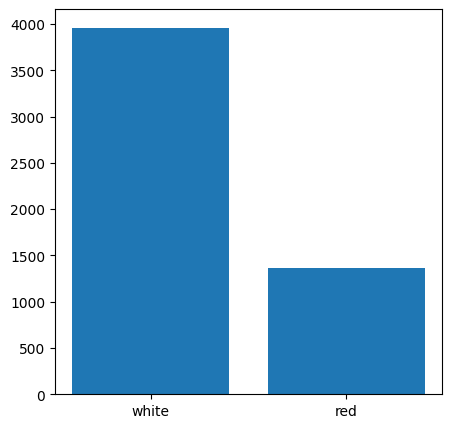

In [ ]:
# Analizamos la columna type

wine_type = winelimpio["type"].value_counts()
wine_type_index = wine_type.index
fig, w_type = plt.subplots(figsize=(5,5))
w_type.bar(wine_type_index, wine_type)
wine_type

Observamos que el data set cuenta con mas cantidad de información de vinos blancos que rojos. Se puede llegar a pensar e hipotizar que hay mas vinho verde blanco que rojo, es decir, que se producen mayormente que uvas blancas.

Text(0.5, 0, 'fixed acidity [g/dcm3]')

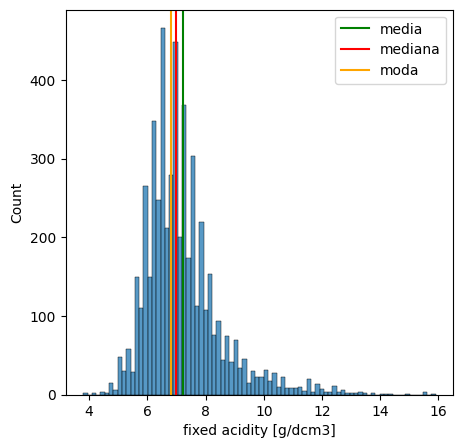

In [ ]:
# Analizamos la columna fixed acidity

fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data = winelimpio, x = "fixed acidity")

plt.axvline(winelimpio['fixed acidity'].mean(),
            label='media',
            color='green')

plt.axvline(winelimpio['fixed acidity'].median(),
            label='mediana',
            color='red')

plt.axvline(float(winelimpio['fixed acidity'].mode()),
            label='moda',
            color='orange')

plt.legend()

plt.xlabel('fixed acidity [g/dcm3]')

Creamos un histograma para la columna fixed acidtity.
Visualizamos que es unimodal, que presenta una distribucion uniforme y vemos que tanto la media, mediana y moda presentan valores similares (aproximadamente 7 g/dcm3). La distribución de los valores parece aproximadamente normal.

Text(0.5, 0, 'volatile acidity [g/dcm3]')

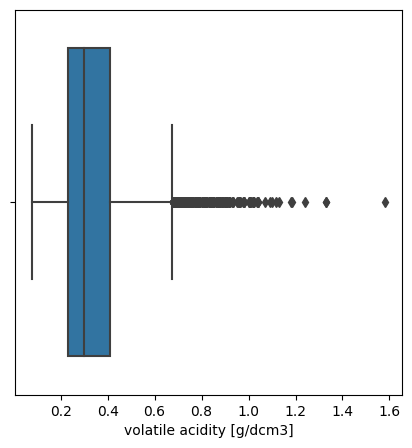

In [ ]:
# Analizamos los otuliers de volatile acidity

fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x =winelimpio["volatile acidity"])
plt.xlabel('volatile acidity [g/dcm3]')

Aca podemos ver el primer cuartil en aproximadamente 0,2 g/dcm3 la mediana en 0,3 g/dcm3 y el tercer cuartil en 0,4 g/dcm3. Luego vemos que aparecen valores atipicos a partir de 0,6 g/dcm3. No seguimos analizando estos tipos de graficos ya que consideramos que el data set no presenta outliers.

Continuamos con el analisis de cada una de las distribuciones de las variables.

Text(0, 0.5, 'Cantidad')

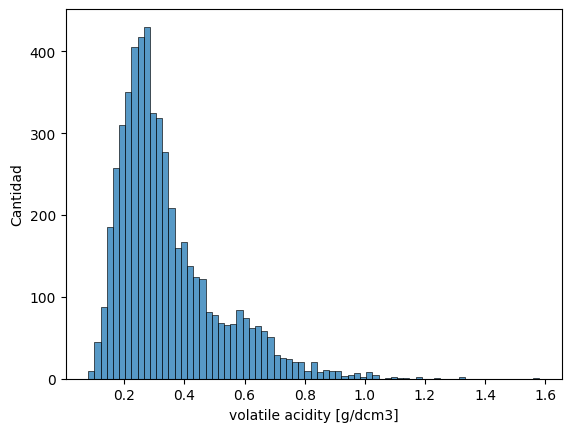

In [ ]:
# Analizamos la columna volatile acidity

sns.histplot(data = winelimpio, x = "volatile acidity")
plt.xlabel('volatile acidity [g/dcm3]')
plt.ylabel('Cantidad')

Como podemos observar la variable volatile acidity presenta un grafico unimodal con la mayor cantidad de observaciones en aproximadamente 0,3 g/dcm3. Se puede observar una leve asimetria hacia la derecha.

Text(0, 0.5, 'Cantidad')

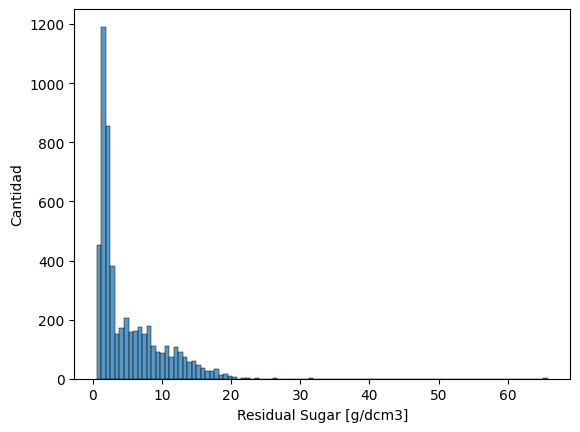

In [ ]:
# Analizamos la columna residual sugar

sns.histplot(data = winelimpio, x = "residual sugar")
plt.xlabel('Residual Sugar [g/dcm3]')
plt.ylabel('Cantidad')

Como podemos observar la variable residual sugar presenta un grafico unimodal con la mayor cantidad de observaciones en aproximadamente 2 g/dcm3. Se puede observar una leve asimetria hacia la derecha.

Text(0, 0.5, 'Cantidad')

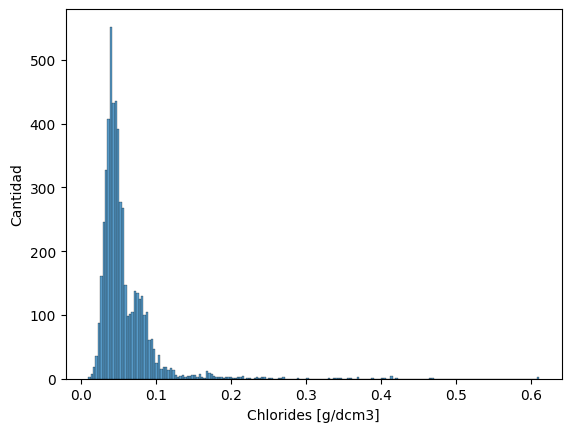

In [ ]:
# Analizamos la columna chlorides

sns.histplot(data = winelimpio, x = "chlorides")
plt.xlabel('Chlorides [g/dcm3]')
plt.ylabel('Cantidad')

Como podemos observar la variable chlorides presenta un grafico unimodal con la mayor cantidad de observaciones en aproximadamente 0,3 g/dcm3. La distribución parece normal pero encontramos valores que llegan hasta los 0,6 g/dcm3.

Text(0, 0.5, 'Cantidad')

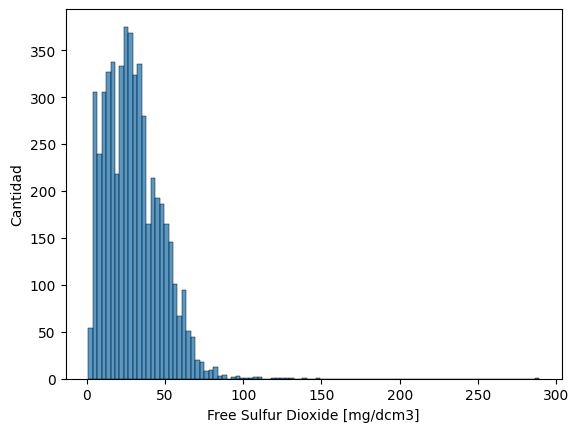

In [ ]:
# Analizamos la columna free sulfur dioxide

sns.histplot(data = winelimpio, x = "free sulfur dioxide")
plt.xlabel('Free Sulfur Dioxide [mg/dcm3]')
plt.ylabel('Cantidad')

Como podemos observar la variable free sulfur dioxide presenta un grafico unimodal con la mayor cantidad de observaciones en aproximadamente 30 mg/dcm3. Esta variable parece tener una distribución normal.

Text(0, 0.5, 'Cantidad')

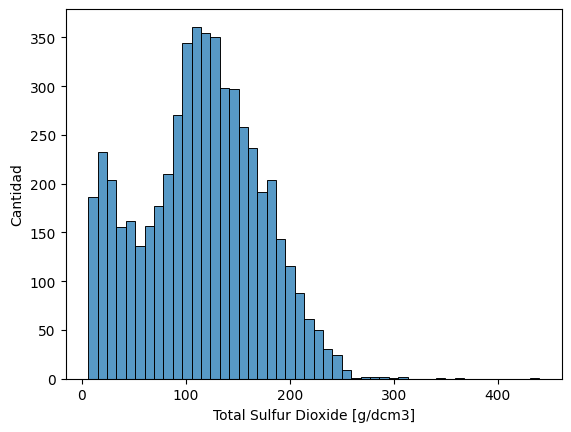

In [ ]:
sns.histplot(data = winelimpio, x = "total sulfur dioxide")
plt.xlabel('Total Sulfur Dioxide [g/dcm3]')
plt.ylabel('Cantidad')

Como podemos observar la variable total sulfur dioxide presenta un grafico bimodal con dos zonas con mayor cantidad de frecuencias la de los 20 g/dcm3 y la de los 130 g/dcm3

Text(0, 0.5, 'Cantidad')

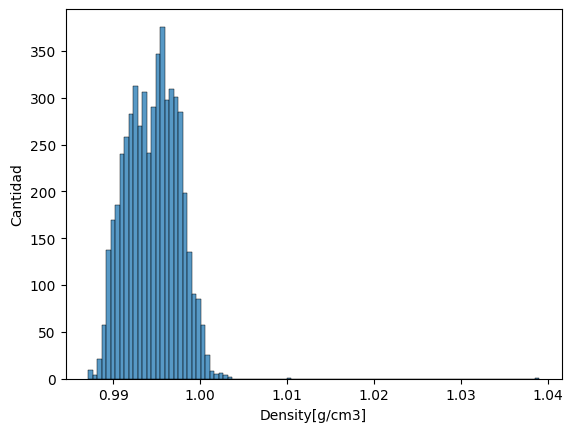

In [ ]:
sns.histplot(data = winelimpio, x = "density")
plt.xlabel('Density[g/cm3]')
plt.ylabel('Cantidad')

Como podemos observar la variable density presenta un grafico unimodal con la mayor cantidad de observaciones en aproximadamente 0,996 g/cm3. La distribución de los datos es normal.

Text(0, 0.5, 'Cantidad')

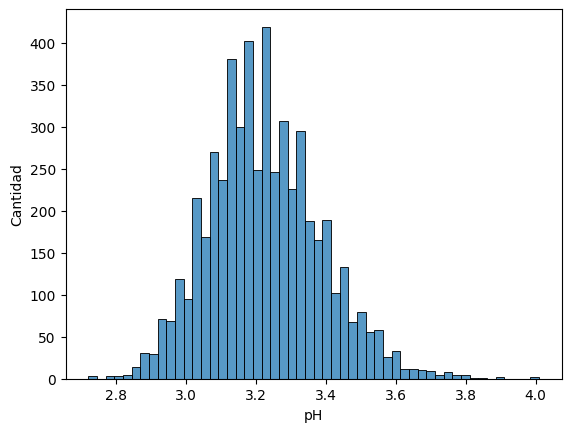

In [ ]:
sns.histplot(data = winelimpio, x = "pH")
plt.xlabel('pH')
plt.ylabel('Cantidad')

Como podemos observar la variable pH presenta un grafico unimodal con la mayor cantidad de observaciones en aproximadamente 3,2. La distribución de los datos es normal.

Text(0, 0.5, 'Cantidad')

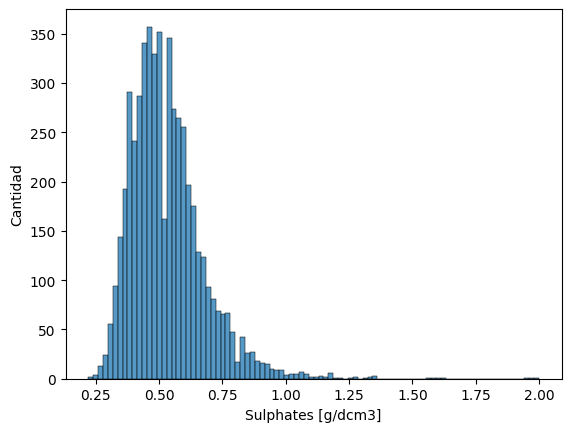

In [ ]:
sns.histplot(data = winelimpio, x = "sulphates")
plt.xlabel('Sulphates [g/dcm3]')
plt.ylabel('Cantidad')

Como podemos observar la variable sulphates presenta un grafico unimodal con la mayor cantidad de observaciones en aproximadamente 0,5 g/dcm3. La distribución parece casi normal con una leve asimetria hacia la derecha.

Text(0, 0.5, 'Cantidad')

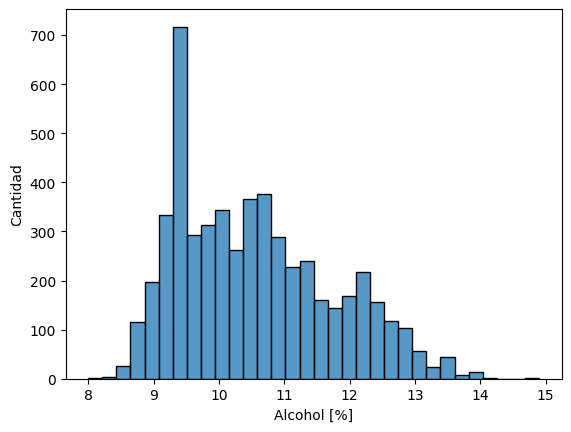

In [ ]:
sns.histplot(data = winelimpio, x = "alcohol")
plt.xlabel('Alcohol [%]')
plt.ylabel('Cantidad')

Como podemos observar la variable residual sugar presenta un grafico unimodal con la mayor cantidad de observaciones en aproximadamente 9,4 %. Presenta una asimetria de los datos hacia la derecha.

Text(0, 0.5, 'Cantidad')

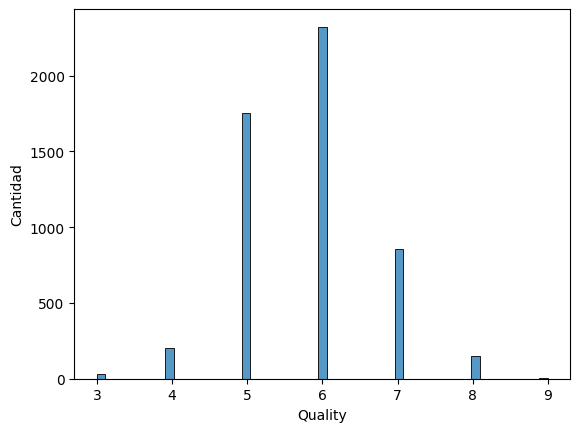

In [ ]:
sns.histplot(data = winelimpio, x = "quality")
plt.xlabel('Quality')
plt.ylabel('Cantidad')

Como podemos observar en el grafico la mayor cantidad de vinos que aparecen dentro del data frame fueron puntuados con una nota de 6

Luego continuamos con el analisis entre variables para continuar obteniendo información.

#**2.4. ANALISIS BIVARIADO**

#**2.4.1. HIPOTESIS E INSIGHTS**

Realizamos el analisis bivariado para darle una respuesta a las hipotesis planteadas previamente.

**HIPOTESIS 1**

Text(0, 0.5, 'Alcohol [%]')

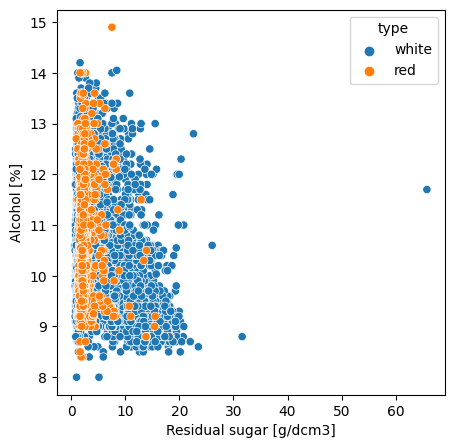

In [ ]:
# Analisis Residual Sugar vs Alcohol

fig, ax = plt.subplots(figsize=(5, 5)) # Creamos el entorno y asignamos el tamño del grafico
sns.scatterplot(data=winelimpio, x="residual sugar", y="alcohol", hue="type") # Creamos el grafico de dispercion con las variables residual sugar y alcohol. Asignamos colores en base al tipo de vino.
ax.set_xlabel('Residual sugar [g/dcm3]') # Asigno los labels
ax.set_ylabel('Alcohol [%]')

**INSIGHT 1:**

Podemos decir que los vinos con mayor porcentaje de alcohol por lo general presentan menor cantidad de azucar residual. Tambien podemos decir que por lo general los vinos rojos presentan menor cantidad de azucar residual.

**HIPOTESIS 2**

Text(0, 0.5, 'Residual Sugar [g/dcm3]')

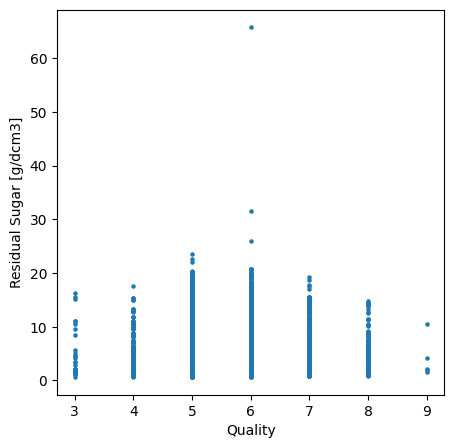

In [ ]:
# Analisis Quality vs Residual Sugar

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(winelimpio["quality"], winelimpio["residual sugar"], s = 5)
ax.set_xlabel('Quality')
ax.set_ylabel('Residual Sugar [g/dcm3]')

**INSIGHT 2:**

No observamos ninguna relacion tan clara entre la cantidad de azucares residuales y la calidad de los vinos. Sin embargo, podemos decir que los vinos mejor calificados poseen poco azucar residual. No podemos decir que todos los vinos con poco azucar residual son calificados con un puntaje alto ya que los vinos calificados con 3 se podria llegar a decir que por lo general tienen poco azucar residual y ademas encontramos vinos en todas las calificaciones con esta caracteristica.

**HIPOTESIS 3**

Text(0, 0.5, 'Volatile Acidity [g/dcm3]')

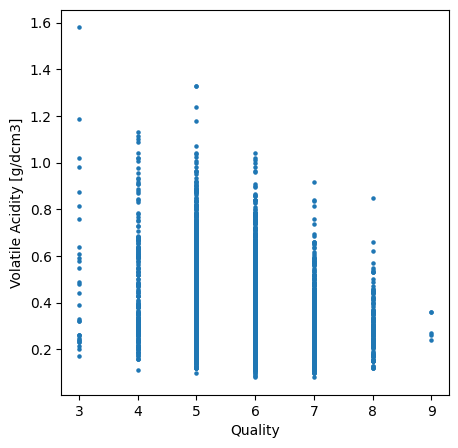

In [ ]:
# Analisis Quality vs Volatile Acidity

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(winelimpio["quality"], winelimpio["volatile acidity"], s = 5) # Asigno tamaño a los puntos
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity [g/dcm3]')

**INSIGHT 3:**

Podemos ver una leve tendencia entre el el acido volatil y la puntuacion. A mejor puntuacion menor acido volatil. Sin embargo, no es la unica cualidad para distinguir a un vino de buena calidad ya que encontramos vinos poco acido volatil de baja calidad. Los mejores vinos poseen entre 0,2 y 0,4 g/dcm3 de acido volatil.

**HIPOTESIS 4**

Text(0, 0.5, 'Volatile Acidity [g/dcm3]')

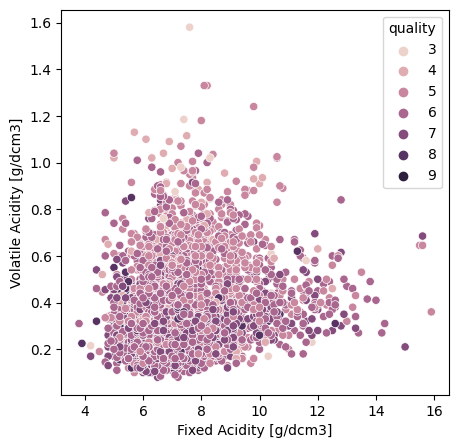

In [ ]:
# Analisis Fixed Acidity vs Volatile Acidity

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=winelimpio, x="fixed acidity", y="volatile acidity", hue="quality") # Asigno colores en base a la puntuación de los puntos
ax.set_xlabel('Fixed Acidity [g/dcm3]')
ax.set_ylabel('Volatile Acidity [g/dcm3]')

**INSIGHT 4:**

Podemos decir que a mayor cantidad de acidez hay menos cantidad de acido en volatilidad. Ademas vemos que existen vinos con poco acido que tienen acido volatil en poca, media y alta alta cantidad. Ademas, no vemos una correlación tan marcada entre las variables.

**HIPOTESIS 5**

Text(0, 0.5, 'Quality')

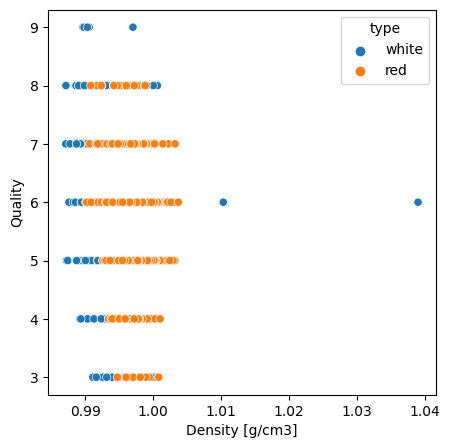

In [ ]:
# Analisis Density vs Quality

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=winelimpio, x="density", y="quality", hue="type")
ax.set_xlabel('Density [g/cm3]')
ax.set_ylabel('Quality')

**INSIGHT 5:**

Podemos observar que no hay ninguna relación a simple vista entre la densidad y el puntaje respecto a la calidad del vino. Lo que si podemos observar es que los vinos puntuados con un 9 son del tipo blanco. Ademas, los vinos tintos se ubican sobre el lado derecho, es decir, que tienen mayor densidad.

Ahora Creamos un grafico para compar Citric Acid con Volatile Acidity

Text(0, 0.5, 'Volatile Acidity [g/dcm3]')

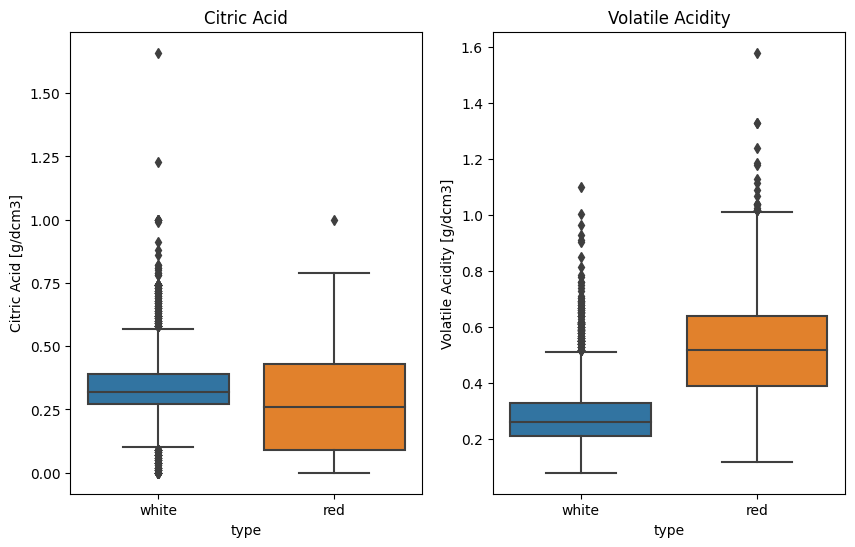

In [ ]:
# Analisis multivariado Citric Acid/Volatile Acidity/Typpe

plt.figure(figsize=(10, 6))

# Subgráfica 1: Boxplot para Variable1
plt.subplot(1, 2, 1)
sns.boxplot(x='type', y='citric acid', data=winelimpio)
plt.title('Citric Acid')
plt.ylabel('Citric Acid [g/dcm3]')

# Subgráfica 2: Boxplot para Variable2
plt.subplot(1, 2, 2)
sns.boxplot(x='type', y='volatile acidity', data=winelimpio)
plt.title('Volatile Acidity')
plt.ylabel('Volatile Acidity [g/dcm3]')

Como podemos observar los vinos rojos presentan en promedio menor cantidad de citric acid y mayor cantidad de volatile acidity en comparacion a los blancos.

#**2.4.2. GRAFICO DE CORRELACIONES Y ANALISIS DE LAS MAS IMPORTANTES**



Creamos una grafico de correlaciones para entender cuales son las variables mas correlacionadas entre si y poder usarlas como imput en futuros analisis.

In [ ]:
# Calculamos las correlaciones entre las distintas features y las ordenamos.

winelimpio.corr().unstack().sort_values().drop_duplicates()

<ipython-input-52-13ee5ae09b9a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  winelimpio.corr().unstack().sort_values().drop_duplicates()


alcohol              density                -0.667811
volatile acidity     total sulfur dioxide   -0.400716
citric acid          volatile acidity       -0.384192
volatile acidity     free sulfur dioxide    -0.349039
citric acid          pH                     -0.344735
                                               ...   
fixed acidity        density                 0.478180
residual sugar       total sulfur dioxide    0.487519
                     density                 0.520930
free sulfur dioxide  total sulfur dioxide    0.720488
fixed acidity        fixed acidity           1.000000
Length: 67, dtype: float64

<ipython-input-53-18e1beed63ec>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = winelimpio.corr()


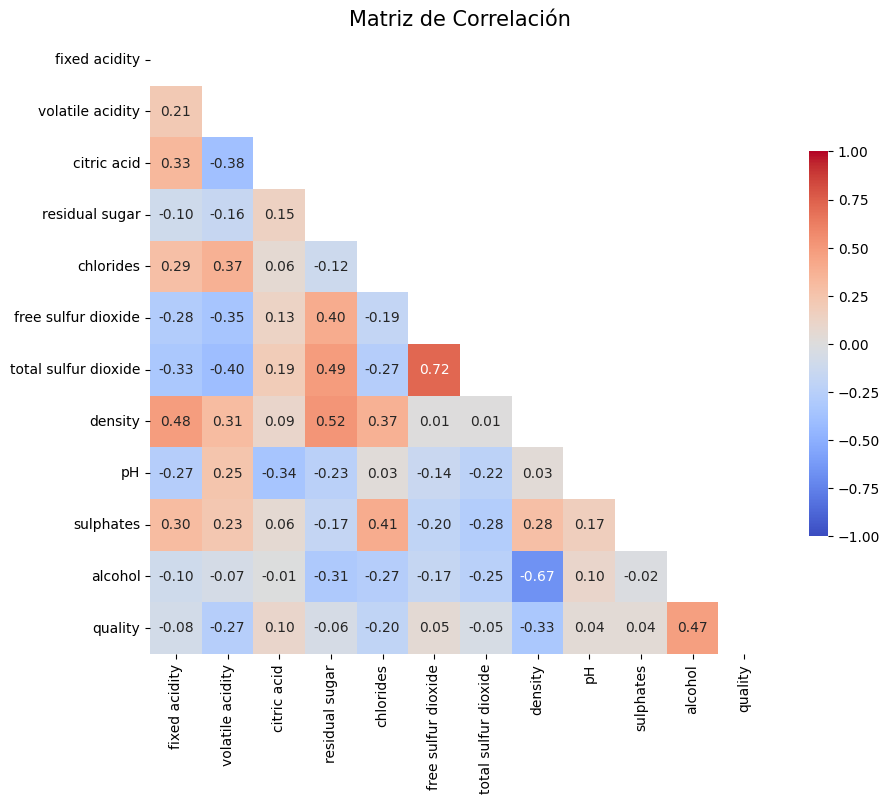

In [ ]:
# Ahora veamos lo mismo de forma gráfica:

correlation = winelimpio.corr()

# Generamos una máscara para mostrar solo el triangulo inferior

mask = np.triu(correlation)
cor = plt.figure(figsize=(10,10))
ax = plt.axes()

#Genero el mapa de calor

sns.heatmap(correlation,
            cbar = True,
            square = True,
            annot = True,
            fmt = '.2f',
            cmap = 'coolwarm',
            vmin =-1,
            vmax =1,
            center = 0,
            cbar_kws = {'shrink': 0.5},
            mask = mask,
            ax = ax
            )

ax.set_title("Matriz de Correlación",
             fontsize=15)
plt.show();

Como podemos observar las variables que mas correlación tienen son:

A) Total de dioxido de sulfuro y el dioxido de sulfuro libre (0,72).

B) La densidad con el % de alcohol (-0,69).

C) Densidad con el azucar residual (0,55).

Por otro lado y volviendo a nuestra punto de interes, la calidad, la variable que mas correlacion positiva tiene con la calidad es el % de alcohol y luego lo sigue la densidad. Luego veremos que al momento de reducir la dimensionalidad tambien queda como la variable mas significativa la densidad.



Luego graficamos los tres graficos de puntos que mas correlación entre variables tienen.

A) Total de dioxido de sulfuro y el dioxido de sulfuro libre.

Text(0, 0.5, 'Free Sulfur Dioxide [g/dcm3]')

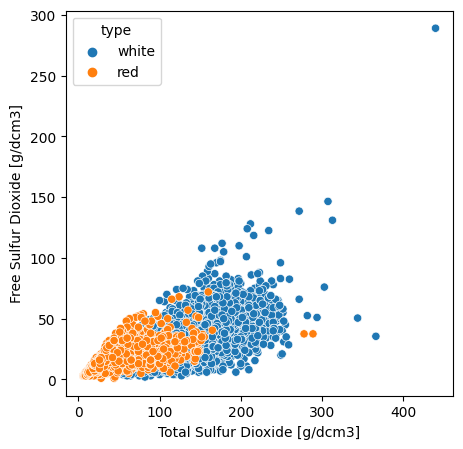

In [ ]:
# Analisis Total Sulfur Dioxide vs Free Sulfur Dioxide

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=winelimpio, x="total sulfur dioxide", y="free sulfur dioxide", hue="type")
ax.set_xlabel('Total Sulfur Dioxide [g/dcm3]')
ax.set_ylabel('Free Sulfur Dioxide [g/dcm3]')

INSIGHT: Observamos una mayor concentración de vinos blancos con poco dioxido de azufre tanto libre como total. Ademas tanto el vino tinto como el blanco esta correlacionado positivamente.

B) La densidad con el % de alcohol.

Text(0, 0.5, 'Alcohol [%]')

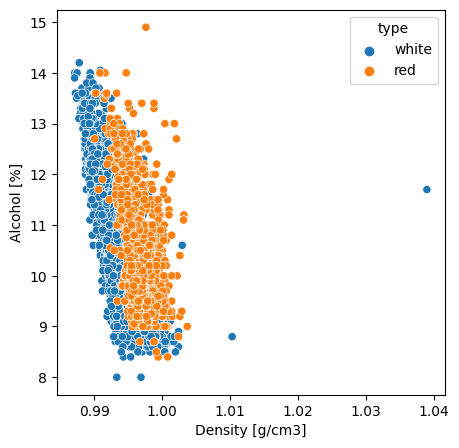

In [ ]:
# Analisis Alcohol vs Density

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=winelimpio, x="density", y="alcohol", hue="type")
ax.set_xlabel('Density [g/cm3]')
ax.set_ylabel('Alcohol [%]')

INSIGHT: Vemos marcada dos zonas en la que los vinos tintos se ubican sobre la derecha por poseer mayor densidad. Se ve claramente la correlación negativa.

C) Densidad con el azucar residual.

Text(0, 0.5, 'Residual sugar [g/dcm3]')

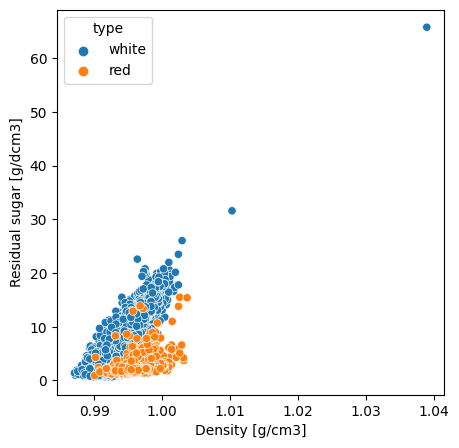

In [ ]:
# Analisis Residual Sugar vs Density

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=winelimpio, x="density", y="residual sugar", hue="type")
ax.set_xlabel('Density [g/cm3]')
ax.set_ylabel('Residual sugar [g/dcm3]')

INSIGHT: Se ve una correlación positiva. Sin embargo, vemos que los vinos tintos parecen tener una correlación diferente a los tintos la cual podriamos llegar a evaluar posteriormente en nuestro analisis.

# **2.5. MACHINE LEARNING**

# **2.5.1. REDUCCIÓN DE DIMENSIONALIDAD**

Aplicamos el proceso de reducción de dimesionalidad para entender cuales son las variables que mas información le aportan al modelo para predecir la variable quality.

In [ ]:
# Creamos nuestra variable x con todas las features y nuestra variable y que es el targuet.

X = winelimpio.drop(["quality","type"], 1)
y = winelimpio['quality']


<ipython-input-57-8f569b0931b8>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = winelimpio.drop(["quality","type"], 1)


In [ ]:
# Aplicamos el metodo sequential feature selector con 1 feature

sfs = SFS(LinearRegression(),
          k_features=1,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs.fit(X, y)
sfs.k_feature_names_

('alcohol',)

In [ ]:
# Aplicamos el metodo sequential feature selector con 2 features

sfs = SFS(LinearRegression(),
          k_features=2,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs.fit(X, y)
sfs.k_feature_names_

('volatile acidity', 'alcohol')

In [ ]:
# Aplicamos el metodo sequential feature selector con 3 features

sfs = SFS(LinearRegression(),
          k_features=3,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs.fit(X, y)
sfs.k_feature_names_

('volatile acidity', 'sulphates', 'alcohol')

Luego observamos las 3 variables que mas le aportan al modelo e influyen en el calculo de la calidad del vino. Tambien vemos que al utilizar el metodo con 1 sola variable la mas significativa es el alcohol y esto concuerda con la correlación de variables.

# **2.5.2 ENTRENANDO MODELO DE ML**

Aplicmos algunos modelos para intentar predecir la variable quality y vemos que efectividad tienen.

In [ ]:
# Creamos nuestra variable x con todas las features y nuestra variable y que es el targuet.

X = winelimpio.drop(["quality","type"], 1)
y = winelimpio['quality']

# Aplicamos el metodo RamdomForestClassifier ya que lo que buscamos predecir es una etiqueta categorica. Utlizamos un test_size del 20%.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)

<ipython-input-19-29e6b813e86b>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = winelimpio.drop(["quality","type"], 1)


In [ ]:
# Utilizamos metrics para ver la efectividad del modelo

accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.568609022556391

In [ ]:
conf_matrix = confusion_matrix(y_test, preds)

print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[  0   0   6   4   0   0   0]
 [  1   1  28  11   0   0   0]
 [  0   0 234 126   1   0   0]
 [  0   0 105 317  33   1   0]
 [  0   0   8 105  52   2   0]
 [  0   0   0  18   9   1   0]
 [  0   0   0   1   0   0   0]]


No entiendo como interpretarlo en este caso, lo lei de chatgpt y la bibliografia de la clase pero no logro comprenderlo cuando la matriz es tan grande

In [ ]:
# Todas las metricas en una unica tabla

print (metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.67      0.14      0.23        44
           5       0.73      0.74      0.73       434
           6       0.64      0.77      0.70       546
           7       0.72      0.58      0.64       227
           8       0.86      0.27      0.41        44
           9       0.00      0.00      0.00         1

    accuracy                           0.69      1300
   macro avg       0.52      0.36      0.39      1300
weighted avg       0.69      0.69      0.67      1300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


El modelo acierta un 68,5 % de las veces.

Ahora probamos RamdomForestClassifier considerando unicamente los vinos blancos para ver si el modelo de ML funciona mejor.

In [ ]:
# Separamos unicamente los vinos blancos del data set

whitewine = wine [wine.type == "white"]
X = whitewine.drop(["quality","type"], 1)
y = whitewine['quality'] # Nuestra variable target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)

<ipython-input-16-c75cd7ebdf0b>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = whitewine.drop(["quality","type"], 1)


In [ ]:
# Calculamos la metrica accuracy

accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.6853846153846154

In [ ]:
# Todas las metricas en una unica tabla

print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.67      0.14      0.23        44
           5       0.73      0.74      0.73       434
           6       0.64      0.77      0.70       546
           7       0.72      0.58      0.64       227
           8       0.86      0.27      0.41        44
           9       0.00      0.00      0.00         1

    accuracy                           0.69      1300
   macro avg       0.52      0.36      0.39      1300
weighted avg       0.69      0.69      0.67      1300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Podemos observar que si utilizamos como muestra a los vinos blancos unicamente el modelo de ML funciona mejor ya que acierta el 69,5 % de las veces. Sin embargo, sigue siendo un modelo no tan confiable.

Ahora probamos con KNN

In [ ]:
# Creamos nuestra variable x con todas las features y nuestra variable y que es el targuet.

X = winelimpio.drop(["quality","type"], 1)
y = winelimpio['quality']

# Aplicamos el metodo KNN ya que lo que buscamos predecir es una etiqueta categorica. Utlizamos un test_size del 20%.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

modelo_knn = KNeighborsClassifier(n_neighbors=2)
modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)

<ipython-input-32-651debe3422a>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = winelimpio.drop(["quality","type"], 1)


In [ ]:
#Calculamos la metrica de eficacia

accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.568609022556391

Como podemos observar es menor a la efectividad del modelo RandomForestClassifier

Volvemos a evaluar el modelo Ramdom Forest pero codificando la columna type

In [17]:
wine_cod = winelimpio

In [18]:
wine_cod['type'] = wine['type'].replace({'red': '0', 'white': '1'})

<ipython-input-18-2dc637b56a55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_cod['type'] = wine['type'].replace({'red': '0', 'white': '1'})


In [20]:
wine_cod.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [25]:
# Creamos nuestra variable x con todas las features y nuestra variable y que es el targuet.

X = wine_cod.drop(["quality"], 1)
y = wine_cod['quality']

# Aplicamos el metodo RamdomForestClassifier ya que lo que buscamos predecir es una etiqueta categorica. Utlizamos un test_size del 20%.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)

<ipython-input-25-4d3e67bd4120>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = wine_cod.drop(["quality"], 1)


In [26]:
# Utilizamos metrics para ver la efectividad del modelo

accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.5723684210526315

Como podemos observar otorgandole mas información la eficacia es mejor.